In [1]:
import numpy as np
import os
import pickle
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

from google.colab import drive
drive.mount('/content/drive')
# import kagglehub

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/codesoft/data'

In [3]:
# Base_dir = path + "/flickr8k"
working_dir = path + "/flickr8k"

In [ ]:
model = VGG16()

model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

print(model.summary())

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
features = {}

directory = os.path.join(path, "Images")

for img_name in tqdm(os.listdir(directory)):
  if not (img_name.endswith(('.txt'))):
    img_path = directory+'/'+img_name

    image = load_img(img_path, target_size=(224,224))

    image = img_to_array(image)

    image = image.reshape((1,image.shape[0], image.shape[1], image.shape[2]))

    image = preprocess_input(image)

    feature = model.predict(image, verbose=0)

    image_id = img_name.split('.')[0]

    features[image_id] = feature

  0%|          | 0/8091 [00:00<?, ?it/s]

In [ ]:
pickle.dump(features, open(os.path.join(path, 'features.pkl'), 'wb'))

In [4]:
with open(os.path.join(path, 'features.pkl'),'rb') as f:
  features = pickle.load(f)

In [5]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/codesoft/data'

In [6]:
with open(os.path.join(base_dir, 'captions.txt'), 'r') as f:
  next(f)
  captions_doc = f.read()

In [7]:
mapping = {}

for line in tqdm(captions_doc.split('\n')):
  tokens = line.split(',')

  if len(line) < 2:
    continue

  image_id, caption = tokens[0], tokens[1:]

  image_id = image_id.split('.')[0]

  caption = " ".join(caption)

  if image_id not in mapping:
    mapping[image_id] = []

  mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

In [8]:
len(mapping)

8091

In [9]:
def clean(mapping):

  for key, captions in mapping.items():

    for i in range(len(captions)):

      caption = captions[i]

      caption = caption.lower()

      caption = caption.replace('[^A-Za-z]', '')

      caption = caption.replace('\s+', ' ')

      caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'

      captions[i] = caption

In [10]:
clean(mapping)

In [11]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [12]:
len(all_captions)

40455

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index)+1

In [14]:
max_length = max(len(caption.split()) for caption in all_captions)
print(max_length)

35


In [15]:
image_ids = list(mapping.keys())
split = int(len(image_ids)*0.90)
train = image_ids[:split]
test = image_ids[split:]

In [16]:
# !pip install tensorflow
import tensorflow as tf
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):

    X1,X2,y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n +=1
            captions = mapping[key]
            for caption in captions:

                seq = tokenizer.texts_to_sequences([caption])[0]

                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]

                    in_seq = pad_sequences([in_seq], maxlen = max_length)[0]

                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)

            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)

                yield (X1,X2), y
                X1, X2, y = list(), list(), list()
                n = 0


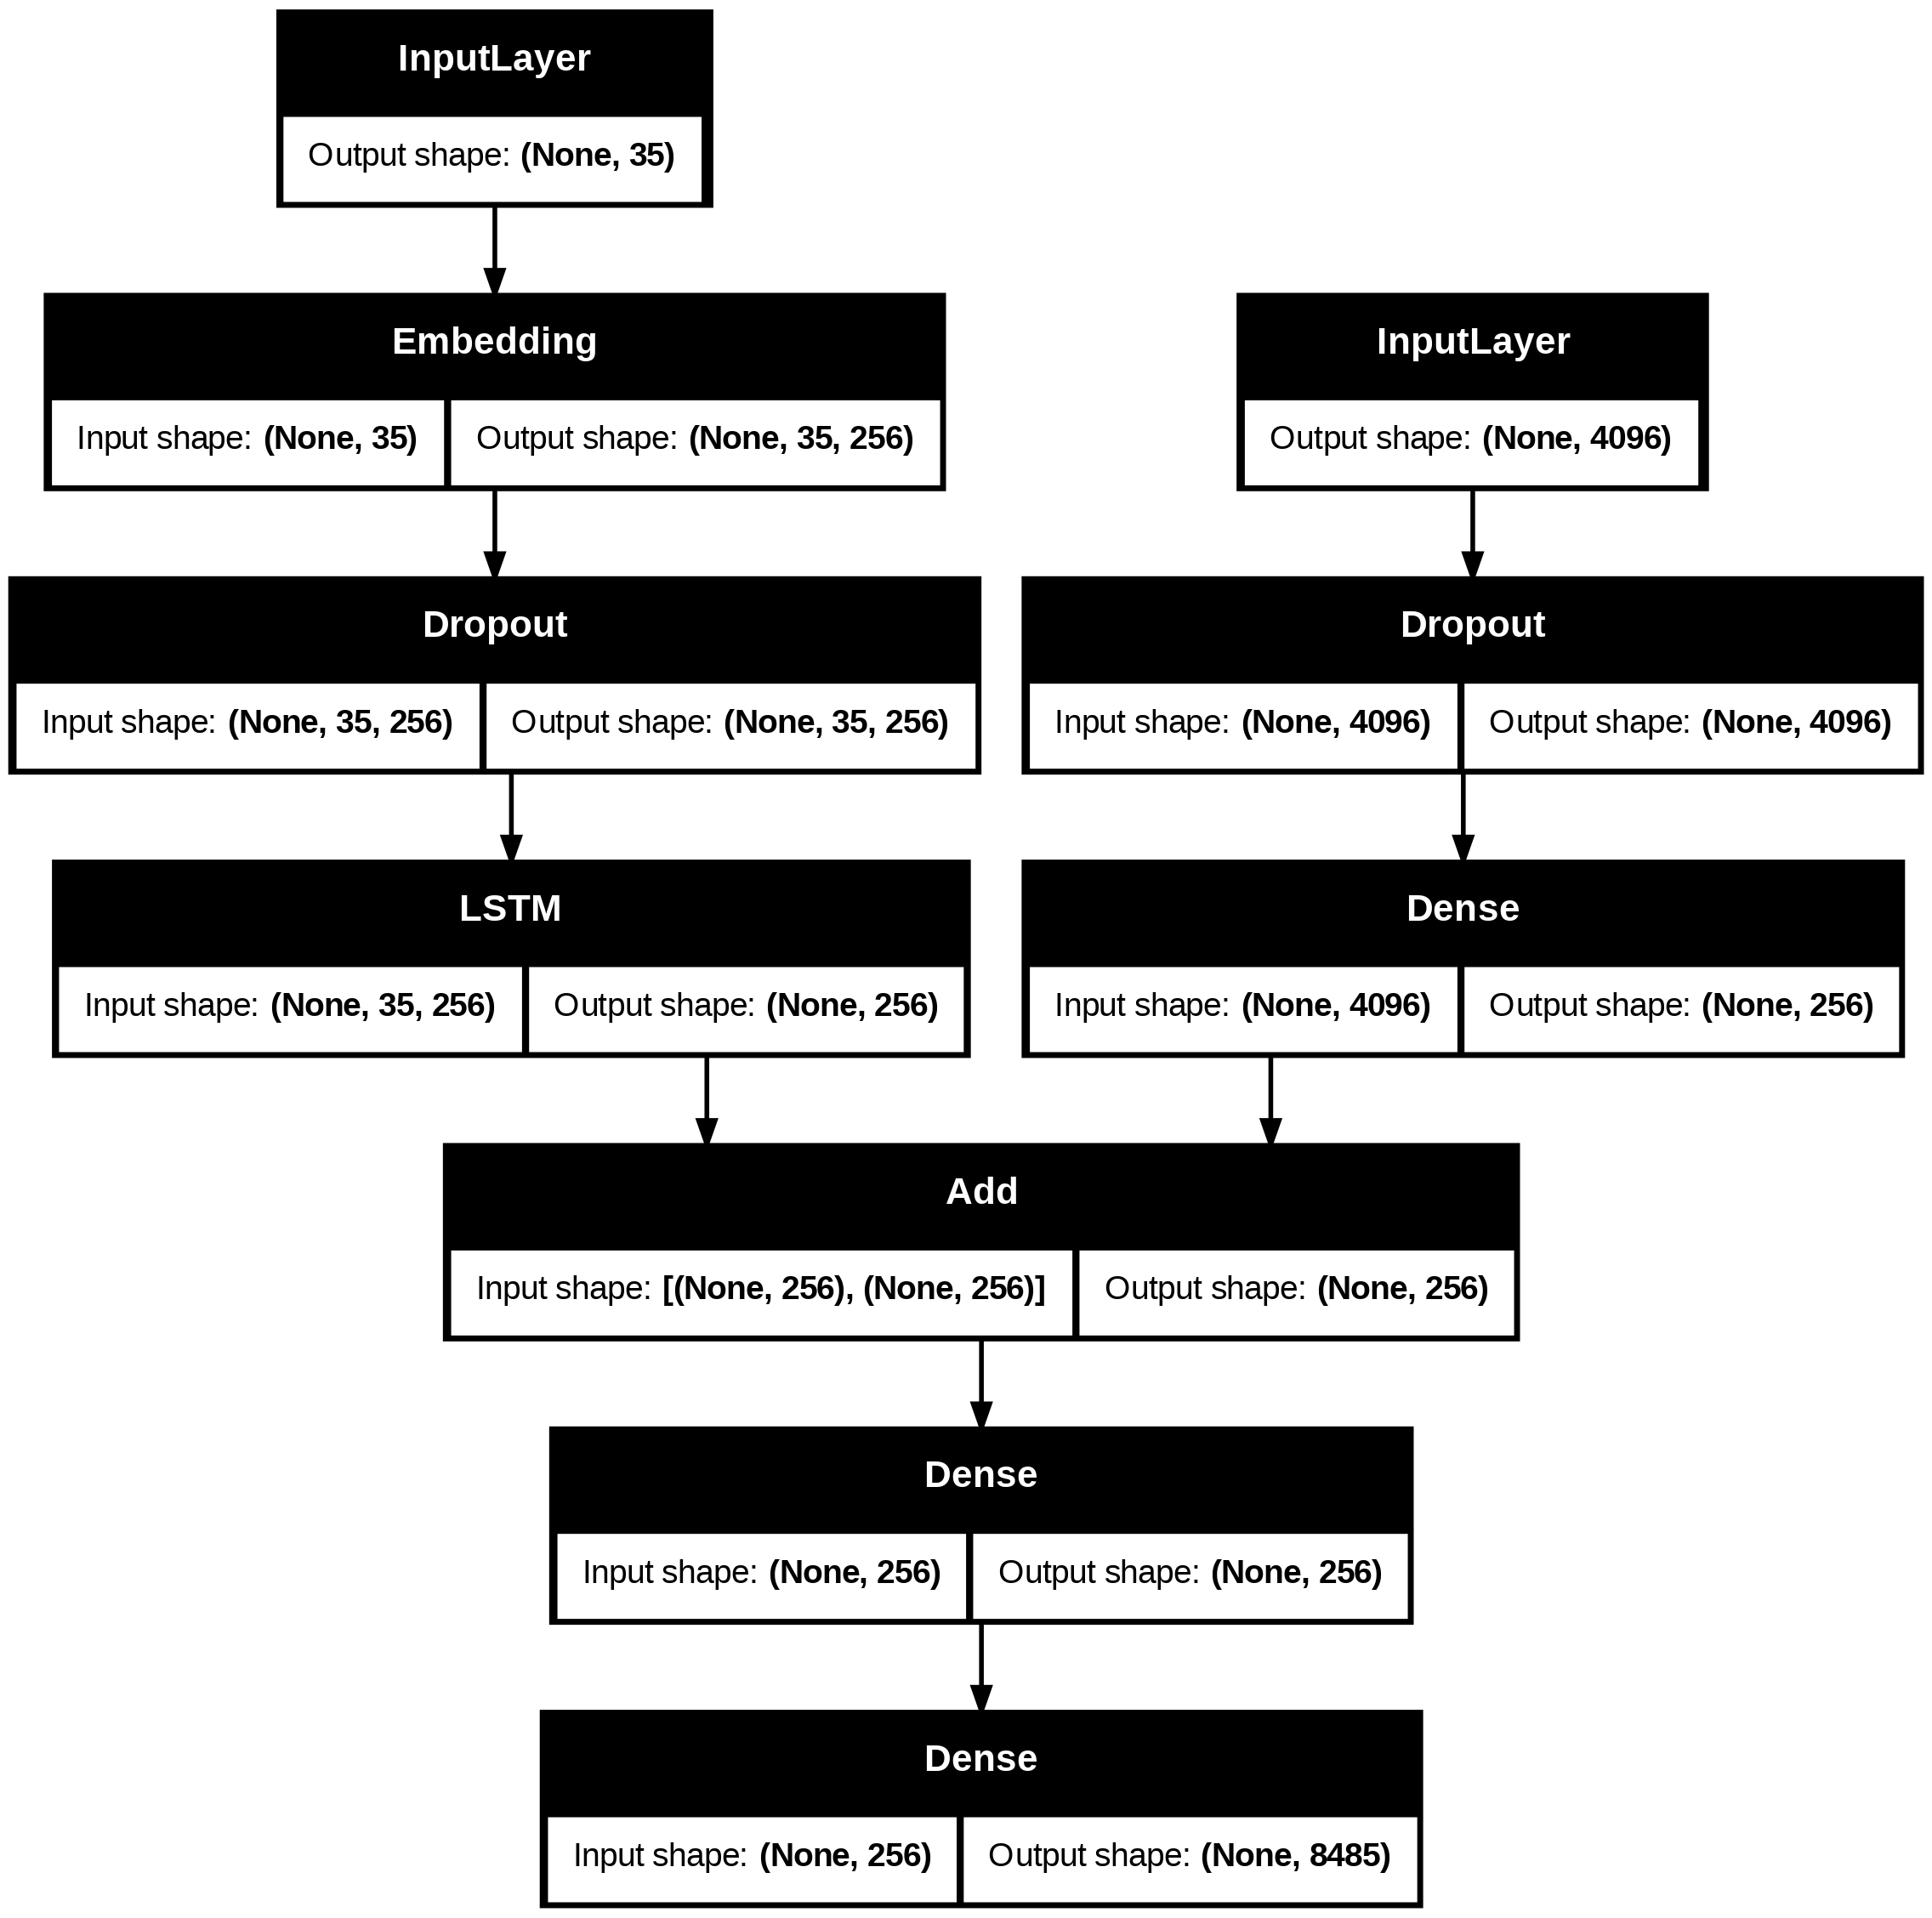

In [17]:
inputs1 = Input(shape=(4096,))

fe1 = Dropout(0.4)(inputs1)

fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape = (max_length,))

se1 = Embedding(vocab_size, 256)(inputs2)

se2 = Dropout(0.4)(se1)

se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

#plot the model
plot_model(model, show_shapes=True)

In [ ]:
epochs = 20

batch_size = 64

steps = len(train) // batch_size

output_signature = (
    (tf.TensorSpec(shape=(None, 4096), dtype=tf.float32),  # X1: Feature vector
     tf.TensorSpec(shape=(None, max_length), dtype=tf.int32)),  # X2: Input sequence
    tf.TensorSpec(shape=(None, vocab_size), dtype=tf.float32)  # y: Output sequence
)

for i in range(epochs):
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # Create a tf.data.Dataset from the generator with the output signature
    dataset = tf.data.Dataset.from_generator(
        lambda: data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size),
        output_signature=output_signature
    )
    model.fit(dataset, epochs=1, steps_per_epoch=steps, verbose=1)

 58/113 ━━━━━━━━━━━━━━━━━━━━ 10:15 11s/step - loss: 6.6012

In [ ]:
model.save(working_dir + 'caption_generator_model.h5')

In [ ]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:
def predict_caption(model, image, tokenizer, max_length):
    in_text = 'startseq'

    for i in range(max_length):

        sequence = tokenizer.texts_to_sequences([in_text])[0]

        sequence = pad_sequences([sequence], max_length)

        yhat = model.predict([image, sequence], verbose=0)

        yhat = np.argmax(yhat)

        word =  idx_to_word(yhat, tokenizer)

        if word is None:
            break

        in_text += " " + word

        if word == 'endseq':
            break
    return in_text

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt


def generate_caption(image_name):

    image_id = image_name.split('.')[0]
    img_path = os.path.join(base_dir, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]

    print('---------------------Actual---------------------')

    for caption in captions:
        print(caption)

    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)

    print('--------------------Predicted--------------------')
    print(y_pred)

    plt.imshow(image)

In [ ]:
generate_caption("1001773457_577c3a7d70.jpg")
generate_caption("109738763_90541ef30d.jpg")